In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CreditScore.csv")
df.shape

(4446, 15)

In [4]:
df = df.drop(["Unnamed: 0"],axis=1)

In [5]:
df["Status"] = pd.get_dummies(df["Status"],drop_first=True)
df["Records"] = pd.get_dummies(df["Records"],drop_first=True) ##applying one hot encoding on these two features

In [6]:
# Apply Label Encoding for Home, Marital, and Job features
home_dict = {"owner":5,"rent":4,"parents":3,"other":2,"priv":1,"ignore":0}
df["Home"] = df["Home"].map(home_dict)
marital_dict = {"married":4,"single":3,"separated":2,"widow":1,"divorced":0}
df["Marital"] = df["Marital"].map(marital_dict)
job_dict = {"fixed":3,"freelance":2,"partime":1,"others":0}
df["Job"] = df["Job"].map(job_dict)

In [7]:
# Identify the independent features(X) and the dependent feature(y)
X = df.drop("Status",axis=1)
y = df["Status"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 11, criterion="entropy")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred, labels=rf.classes_)

0.7638680659670165
0.8738269030239834
0.4826666666666667


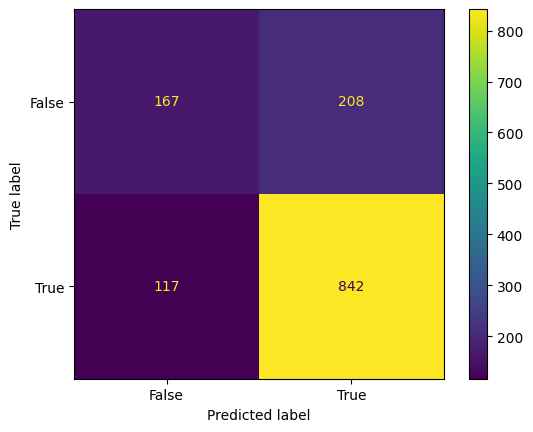

In [13]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot()
TP = 838
TN = 181
FP = 194
FN = 121
ACC = (TP + TN) / (TP + TN + FP + FN)
print(ACC)
TPR = TP / (TP + FN)
print(TPR)
SP = TN / (FP + TN)
print(SP)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
 model = Sequential()

In [16]:
# Create an Input and a Hidden Layer
model.add(Dense(units=50,activation="relu",kernel_initializer="he_uniform"))

In [17]:
# Create an Output Layer
model.add(Dense(units=1,activation="sigmoid"))

In [18]:
# Now, my model is ready to compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Epoch 1/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3731 - accuracy: 0.8290
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8303
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3721 - accuracy: 0.8345
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8310
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8326
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.8329
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8342
Epoch 8/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8342
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8339
Epoch 10/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3707 - accuracy: 0.8332
Epoch 11/

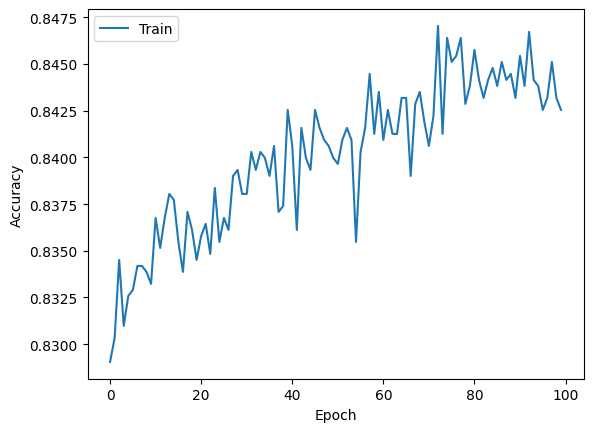

In [23]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100)

# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()


In [24]:
# Predict the X_test results
y_pred = model.predict(X_test)

42/42 [==============================] - 0s 1ms/step


In [25]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [26]:
# Check the accuracy score for final model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7743628185907047
